In [2]:
############### Explore ERA5 Winds Near Beaufort Sea Shelfbreak Jet #####################
# The purpose of this script is to explore the winds near the Beaufort Sea shelfbreak 
# jet as seen in ERA5 data. We especially care about alongshore wind data during the time
# of ice formation/freeze-up in the Fall.
#
# Notes:
# - 
#
##########################################################################################

In [3]:
# Load in the packages
import xarray as xr
import numpy as np
import cartopy
import glob
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
import xroms
from matplotlib import ticker
crs = ccrs.PlateCarree()
warnings.filterwarnings("ignore") 
#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

from xhistogram.xarray import histogram

In [4]:
# Load in the wind data
# Load in the ERA5 winds
era5_winds = xr.open_dataset('//pscratch/sd/b/bundzis/Beaufort_ROMS_2020_dvd_myroms_ice_scratch/External_data/ERA5_data/uwind_vwind_10m_era5_2017_2024.nc')
era5_winds

<xarray.Dataset> Size: 908MB
Dimensions:     (valid_time: 70128, longitude: 77, latitude: 21)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Data variables:
    u10         (valid_time, latitude, longitude) float32 454MB ...
    v10         (valid_time, latitude, longitude) float32 454MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.5.0 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Wed Aug 06 14:28:38 2025: cdo mergetime uwind_vw...
    CDO:                     Climate Data Operators version 2.5.0 (https://mp...

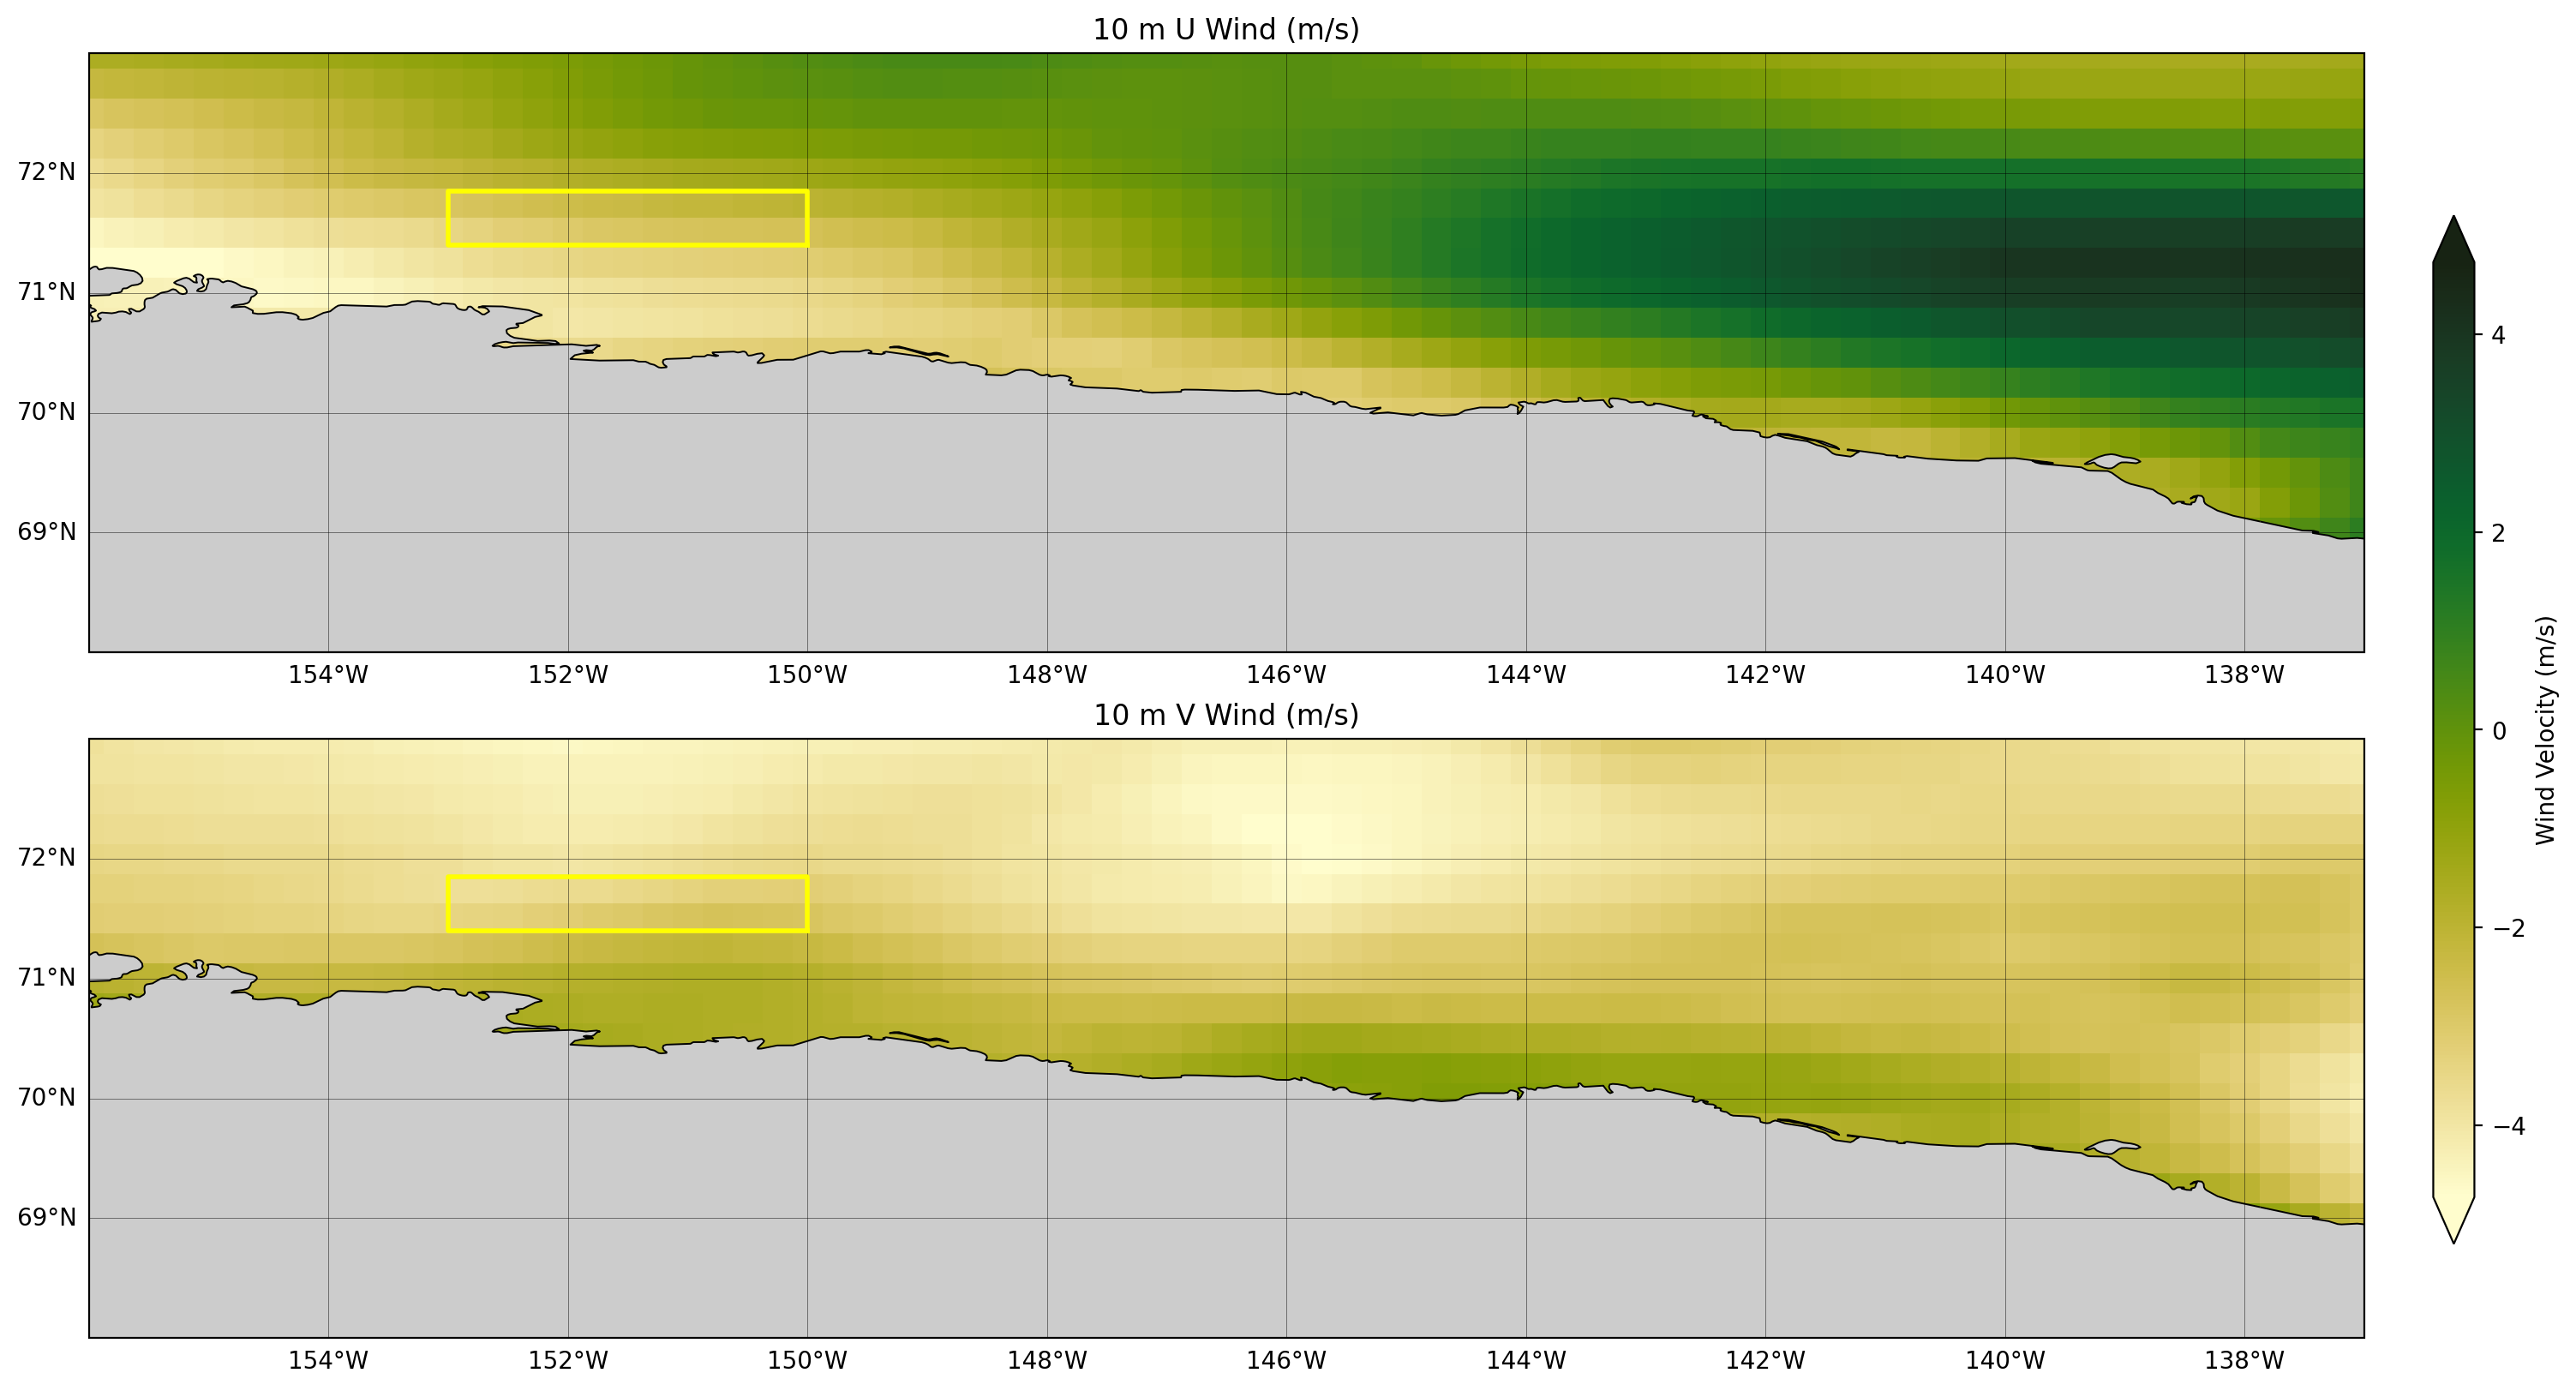

In [7]:
# Plot the area we have data for 
# Plot the region that the data covers
# Box 1

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_winds.u10.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.speed, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[0].set_title('10 m U Wind (m/s)')

# Plot surface u at 2019-09-15
m2 = era5_winds.v10.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.speed, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[1].set_title('10 m V Wind (m/s)')


# Make a shared colorbar 
cbar_ax1 = fig.add_axes([0.94,0.10,0.015,0.75])
fig.colorbar(m1,ax=ax,extend='both',
             label='Wind Velocity (m/s)',
             pad=0.03, cax=cbar_ax1)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 1
box_min_lon_01 = -150
box_max_lon_01 = -153
box_min_lat_01 = 71.4
box_max_lat_01 = 71.85
# Plot Box 1
ax[0].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)

fig.canvas.draw()

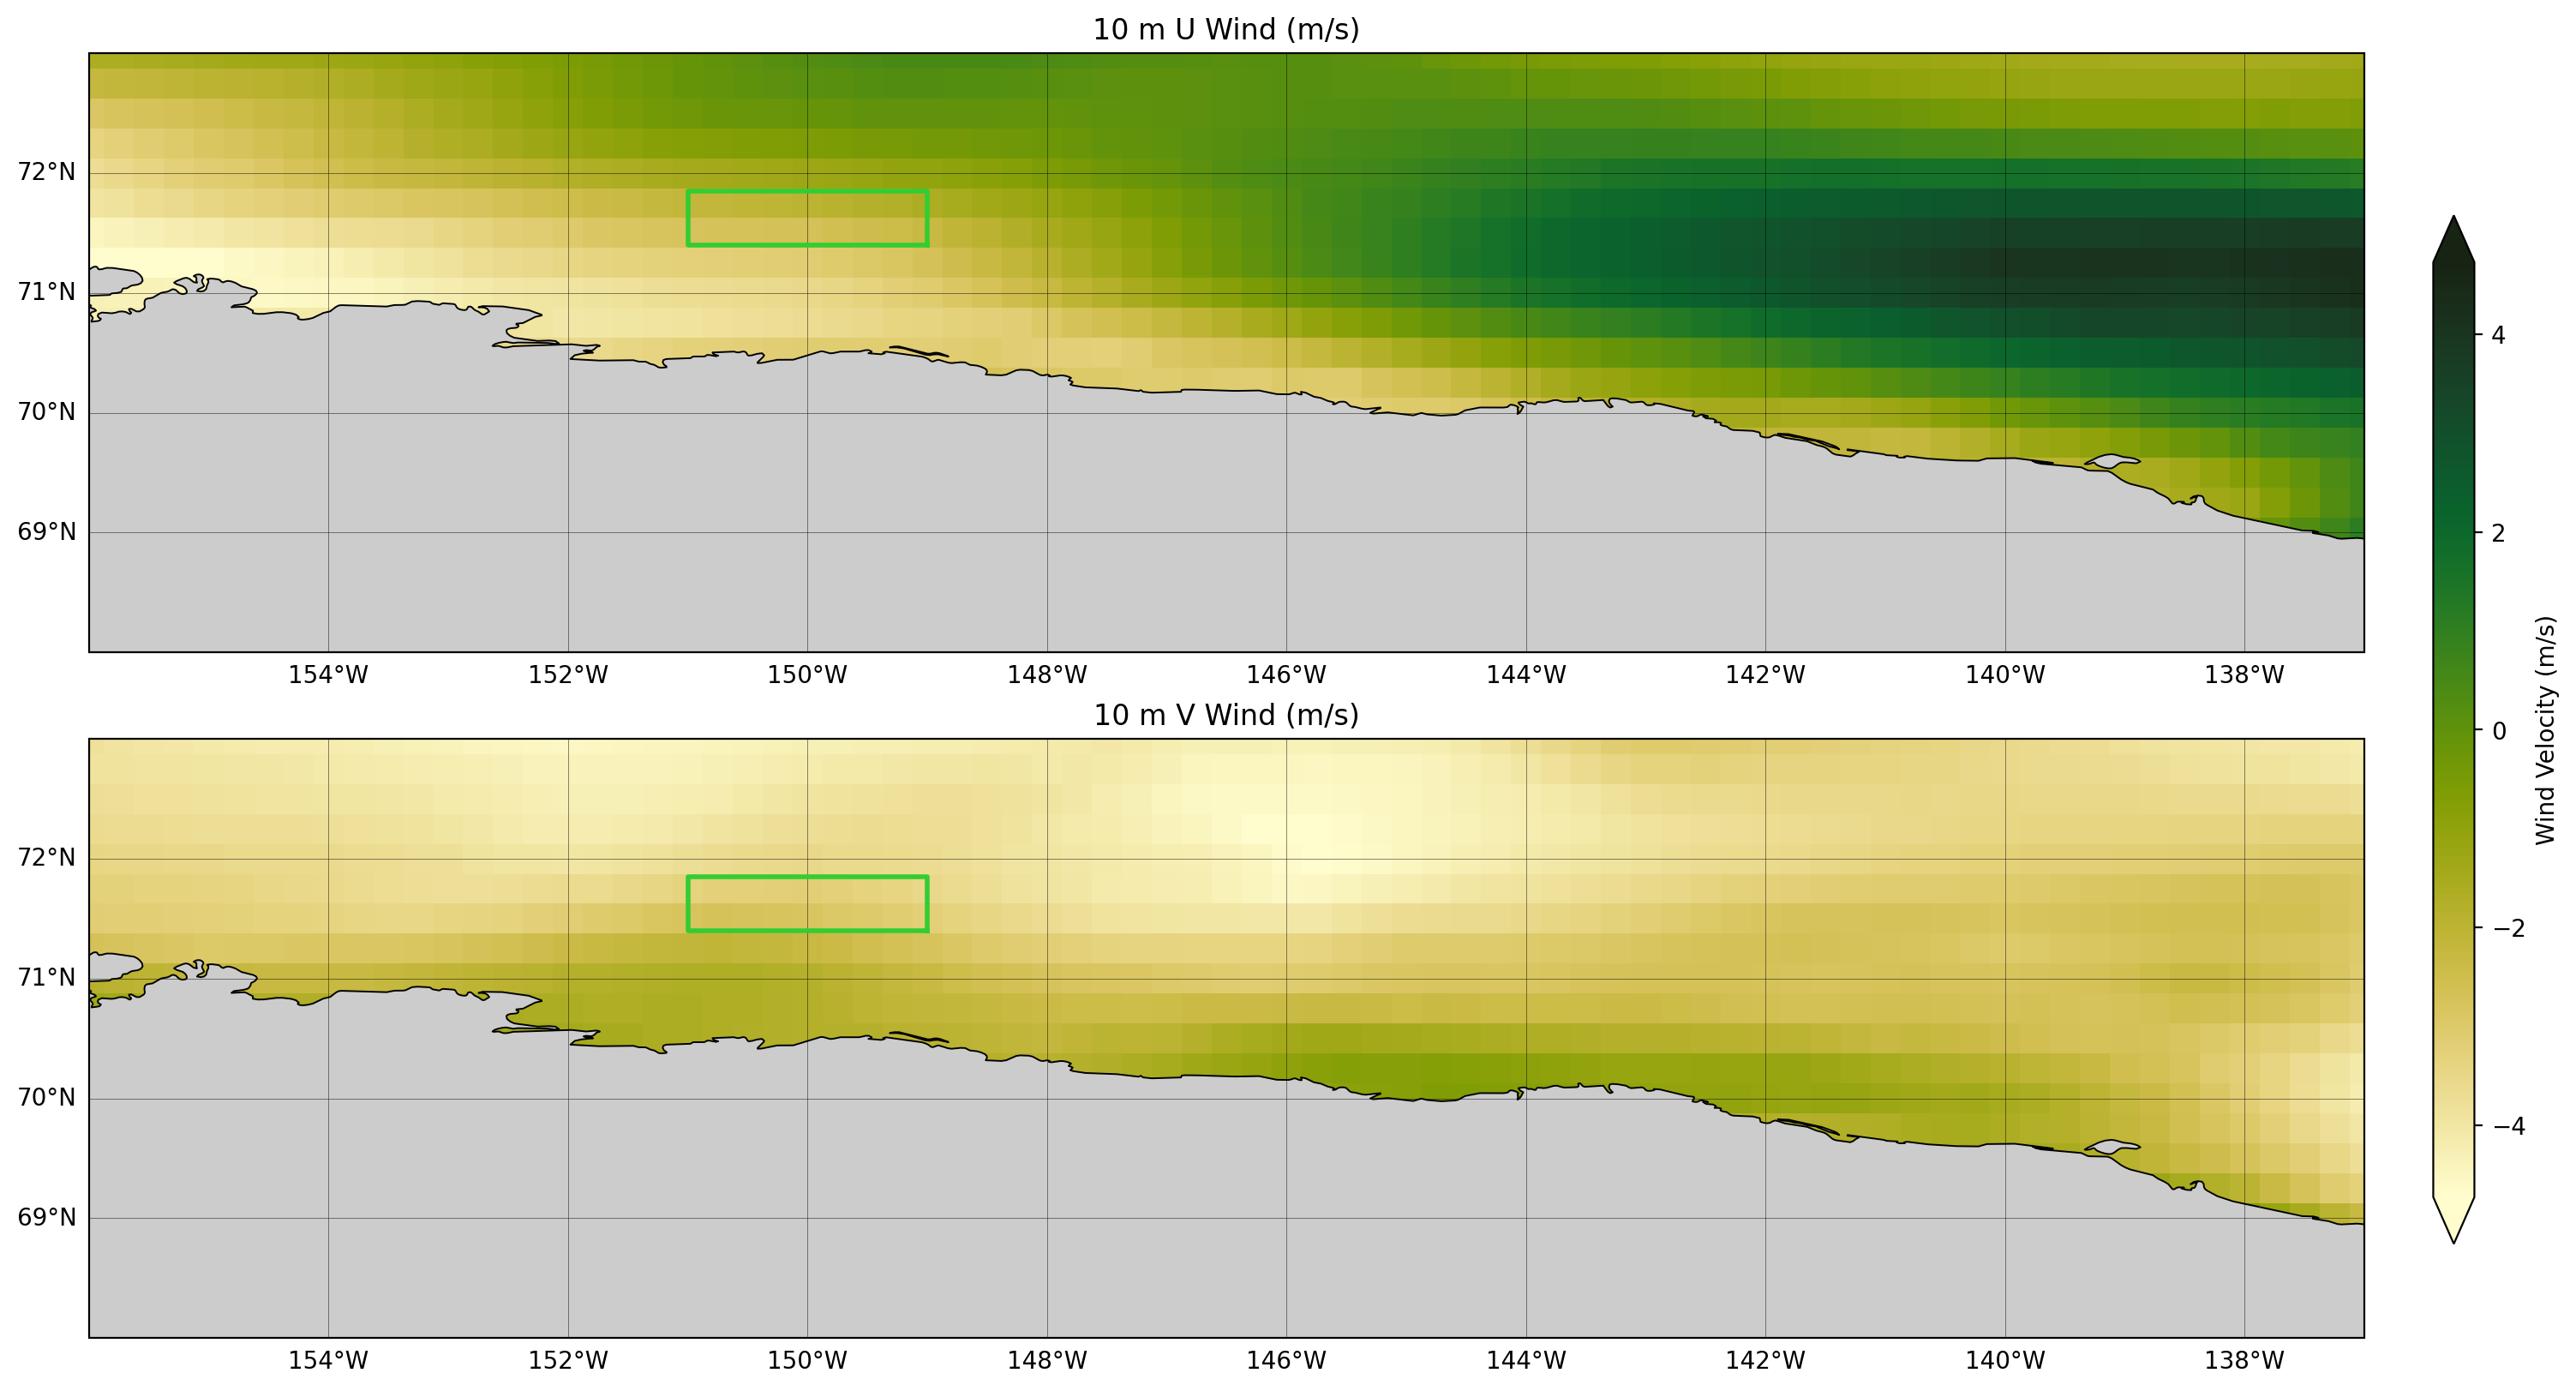

In [8]:
# Plot the region that the data covers
# Box 2

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_winds.u10.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.speed, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[0].set_title('10 m U Wind (m/s)')

# Plot surface u at 2019-09-15
m2 = era5_winds.v10.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.speed, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[1].set_title('10 m V Wind (m/s)')


# Make a shared colorbar 
cbar_ax1 = fig.add_axes([0.94,0.10,0.015,0.75])
fig.colorbar(m1,ax=ax,extend='both',
             label='Wind Velocity (m/s)',
             pad=0.03, cax=cbar_ax1)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 2
box_min_lon_02 = -149
box_max_lon_02 = -151
box_min_lat_02 = 71.4
box_max_lat_02 = 71.85
# Plot Box 2
ax[0].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)

fig.canvas.draw()

In [9]:
# Get the data in the two boxes
# Convert to 360 bassed lat/lon
# Box 1
box_min_lon_01_360 = box_max_lon_01 + 360 
box_max_lon_01_360 = box_min_lon_01 + 360 
# Box 2
box_min_lon_02_360 = box_max_lon_02 + 360 
box_max_lon_02_360 = box_min_lon_02 + 360 


print('Box 1 Bounds:')
print('min_lon: ', str(box_min_lon_01) + ' (W) or ' + str(box_min_lon_01_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_01) + ' (W) or ' + str(box_max_lon_01_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_01)
print('max_lat: ', box_max_lat_01)
print('Box 2 Bounds:')
print('min_lon: ', str(box_min_lon_02) + ' (W) or ' + str(box_min_lon_02_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_02) + ' (W) or ' + str(box_max_lon_02_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_02)
print('max_lat: ', box_max_lat_02)

# Get the data in our two boxes
# Box 1
u10_reg1 = era5_winds.u10.sel(longitude=slice(box_max_lon_01, box_min_lon_01), latitude=slice(72, 71))
v10_reg1 = era5_winds.v10.sel(longitude=slice(box_max_lon_01, box_min_lon_01), latitude=slice(72, 71))
# Box 2
u10_reg2 = era5_winds.u10.sel(longitude=slice(box_max_lon_02, box_min_lon_02), latitude=slice(72, 71))
v10_reg2 = era5_winds.v10.sel(longitude=slice(box_max_lon_02, box_min_lon_02), latitude=slice(72, 71))

Box 1 Bounds:
min_lon:  -150 (W) or 207 (0 - 360)
max_lon:  -153 (W) or 210 (0 - 360)
min_lat:  71.4
max_lat:  71.85
Box 2 Bounds:
min_lon:  -149 (W) or 209 (0 - 360)
max_lon:  -151 (W) or 211 (0 - 360)
min_lat:  71.4
max_lat:  71.85


In [10]:
u10_reg1

<xarray.DataArray 'u10' (valid_time: 70128, latitude: 5, longitude: 13)> Size: 18MB
[4558320 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 104B -153.0 -152.8 -152.5 ... -150.2 -150.0
  * latitude    (latitude) float64 40B 72.0 71.75 71.5 71.25 71.0
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                10 metre U wind component
    units:                                    m s**-1
    GRIB_paramId:                             165
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1617
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                10 metre U wind component
    GRIB_shortName:                           10u
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    GRIB_surface:                             0.0

In [11]:
# Take the average over space but keep changes in time 
# Box 1
u10_reg1_avg = u10_reg1.mean(dim=['latitude', 'longitude'])
v10_reg1_avg = v10_reg1.mean(dim=['latitude', 'longitude'])
# Box 2
u10_reg2_avg = u10_reg2.mean(dim=['latitude', 'longitude'])
v10_reg2_avg = v10_reg2.mean(dim=['latitude', 'longitude'])

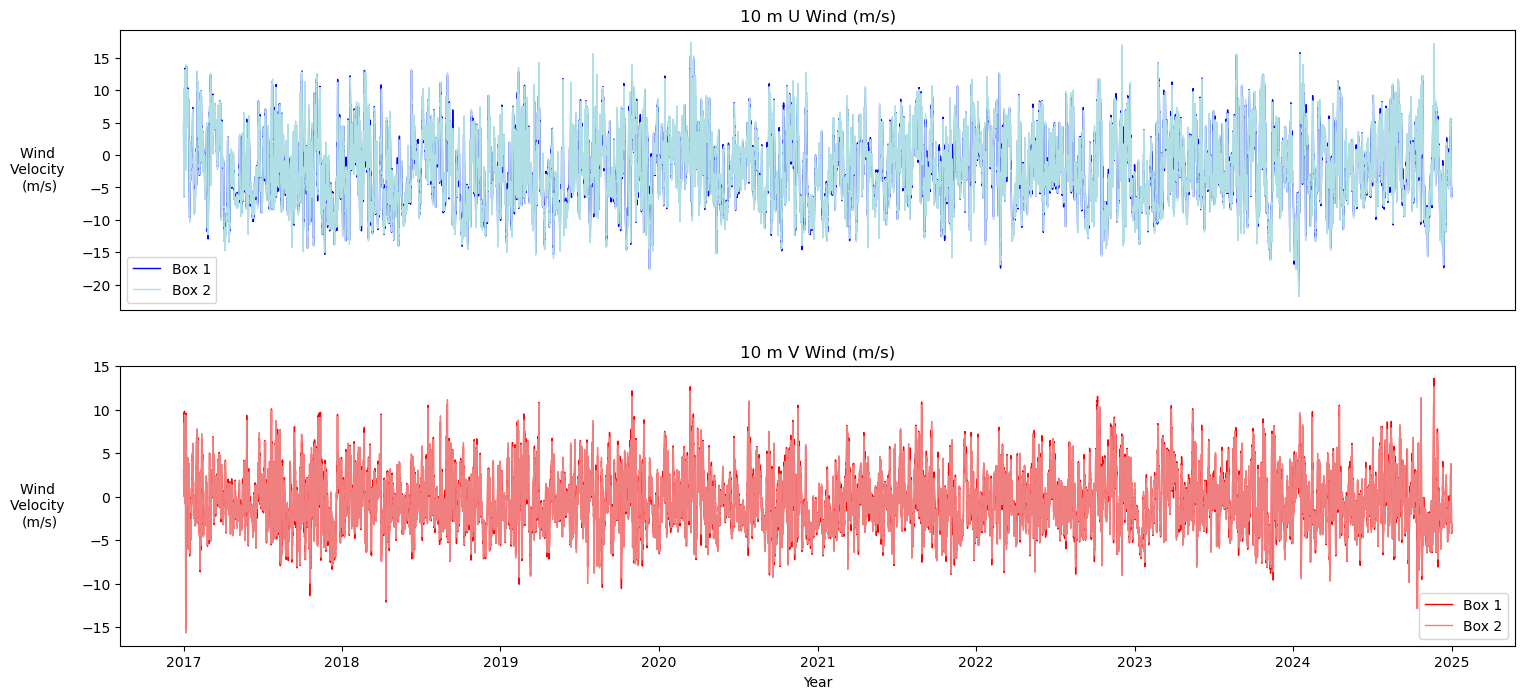

In [23]:
# Plot time series for these two regions (one panel for u
# and another for v)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(era5_winds.valid_time, u10_reg1_avg, color='blue', linewidth=1, label='Box 1')
ax[0].plot(era5_winds.valid_time, u10_reg2_avg, color='powderblue', linewidth=1, label='Box 2')
ax[0].set_title('10 m U Wind (m/s)')
ax[0].set_ylabel('Wind \nVelocity \n(m/s)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(era5_winds.valid_time, v10_reg1_avg, color='red', linewidth=1, label='Box 1')
ax[1].plot(era5_winds.valid_time, v10_reg2_avg, color='lightcoral', linewidth=1, label='Box 2')
ax[1].set_title('10 m V Wind (m/s)')
ax[1].set_ylabel('Wind \nVelocity \n(m/s)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Year')
ax[1].legend()




In [14]:
# Get the average for hour and day of year

# Box 1
# I think this gives the average values for that hour as a function of day of year 
u10_reg1_avg_doy_hrly = u10_reg1_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
v10_reg1_avg_doy_hrly = v10_reg1_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
# Box 2
u10_reg2_avg_doy_hrly = u10_reg2_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
v10_reg2_avg_doy_hrly = v10_reg2_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')

In [16]:
# Loop through to reshape this into the time series we want

# Box 1 
u10_reg1_avg_doy_hrly2 = np.empty((len(u10_reg1_avg_doy_hrly[:,0])*len(u10_reg1_avg_doy_hrly[0,:])))
#print(len(lo1_wave_reg1_avg_d1__hrly3))
v10_reg1_avg_doy_hrly2 = np.empty((len(v10_reg1_avg_doy_hrly[:,0])*len(v10_reg1_avg_doy_hrly[0,:])))
# Box 2
u10_reg2_avg_doy_hrly2 = np.empty((len(u10_reg2_avg_doy_hrly[:,0])*len(u10_reg2_avg_doy_hrly[0,:])))
v10_reg2_avg_doy_hrly2 = np.empty((len(v10_reg2_avg_doy_hrly[:,0])*len(v10_reg2_avg_doy_hrly[0,:])))

# Set the count for looping
count = 0

# Loop through day of year
for d in range(len(u10_reg1_avg_doy_hrly[:,0])):
    # Set th1_indices 
    start = count
    end = start + 24
    #print('start: ', start)
    #print('end: ', end)
 
    # Save this to the array
    # Box 1
    u10_reg1_avg_doy_hrly2[start:end] = u10_reg1_avg_doy_hrly[d,:]
    v10_reg1_avg_doy_hrly2[start:end] = v10_reg1_avg_doy_hrly[d,:]
    # Box 2
    u10_reg2_avg_doy_hrly2[start:end] = u10_reg2_avg_doy_hrly[d,:]
    v10_reg2_avg_doy_hrly2[start:end] = v10_reg2_avg_doy_hrly[d,:]

    # Increase the count
    #print('count before: ', count)
    count = count + 24
    #print('count after: ', count)

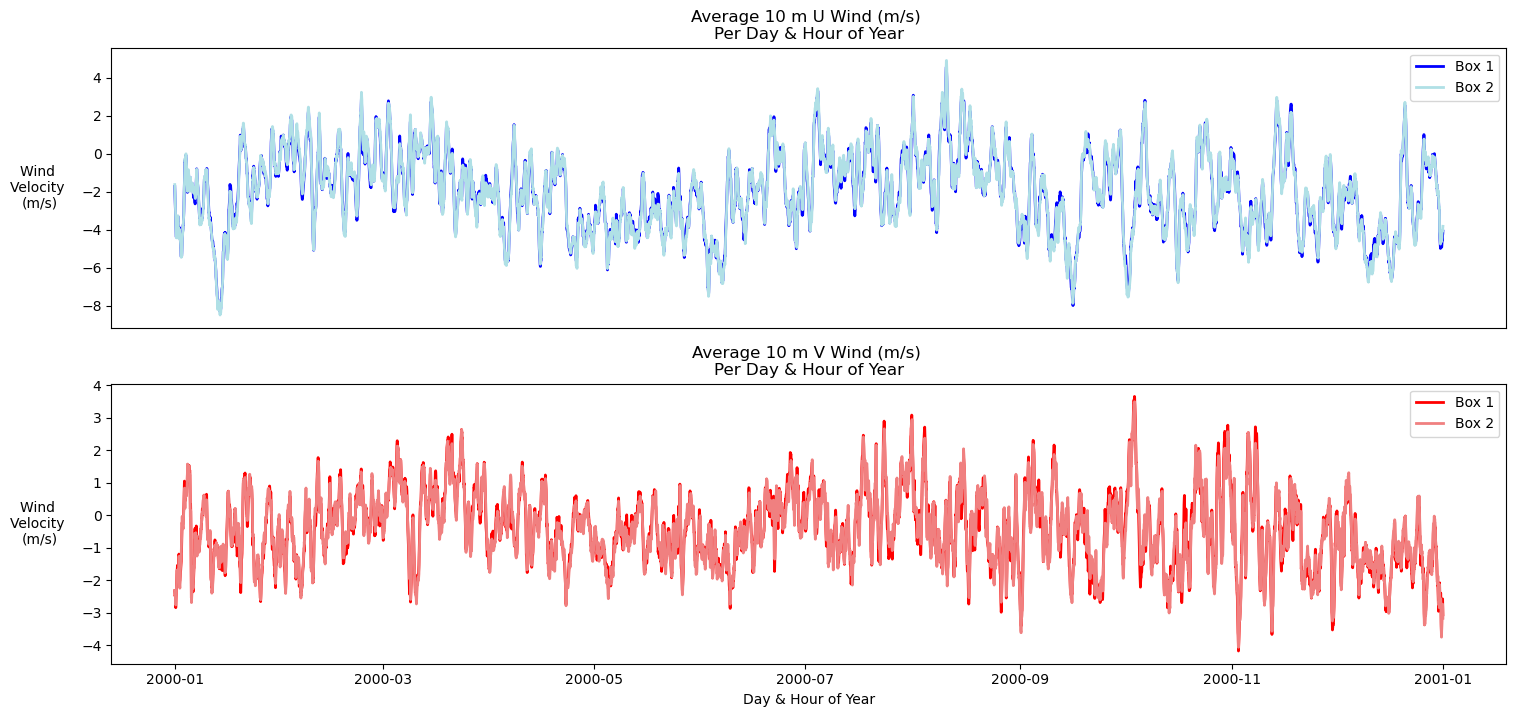

In [24]:
# Make day of year array
day_of_year = np.arange(1, 367, 1)

# Make new time index 
doy_w_hour = np.arange(1, 8785, 1)
hourly_datetimes = pd.date_range(start='2000-01-01', periods=366*24, freq='H')

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(hourly_datetimes, u10_reg1_avg_doy_hrly2, color='blue', linewidth=2, label='Box 1')
ax[0].plot(hourly_datetimes, u10_reg2_avg_doy_hrly2, color='powderblue', linewidth=2, label='Box 2')
ax[0].set_title('Average 10 m U Wind (m/s) \nPer Day & Hour of Year')
ax[0].set_ylabel('Wind \nVelocity \n(m/s)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(hourly_datetimes, v10_reg1_avg_doy_hrly2, color='red', linewidth=2, label='Box 1')
ax[1].plot(hourly_datetimes, v10_reg2_avg_doy_hrly2, color='lightcoral', linewidth=2, label='Box 2')
ax[1].set_title('Average 10 m V Wind (m/s) \nPer Day & Hour of Year')
ax[1].set_ylabel('Wind \nVelocity \n(m/s)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day & Hour of Year')
ax[1].legend()

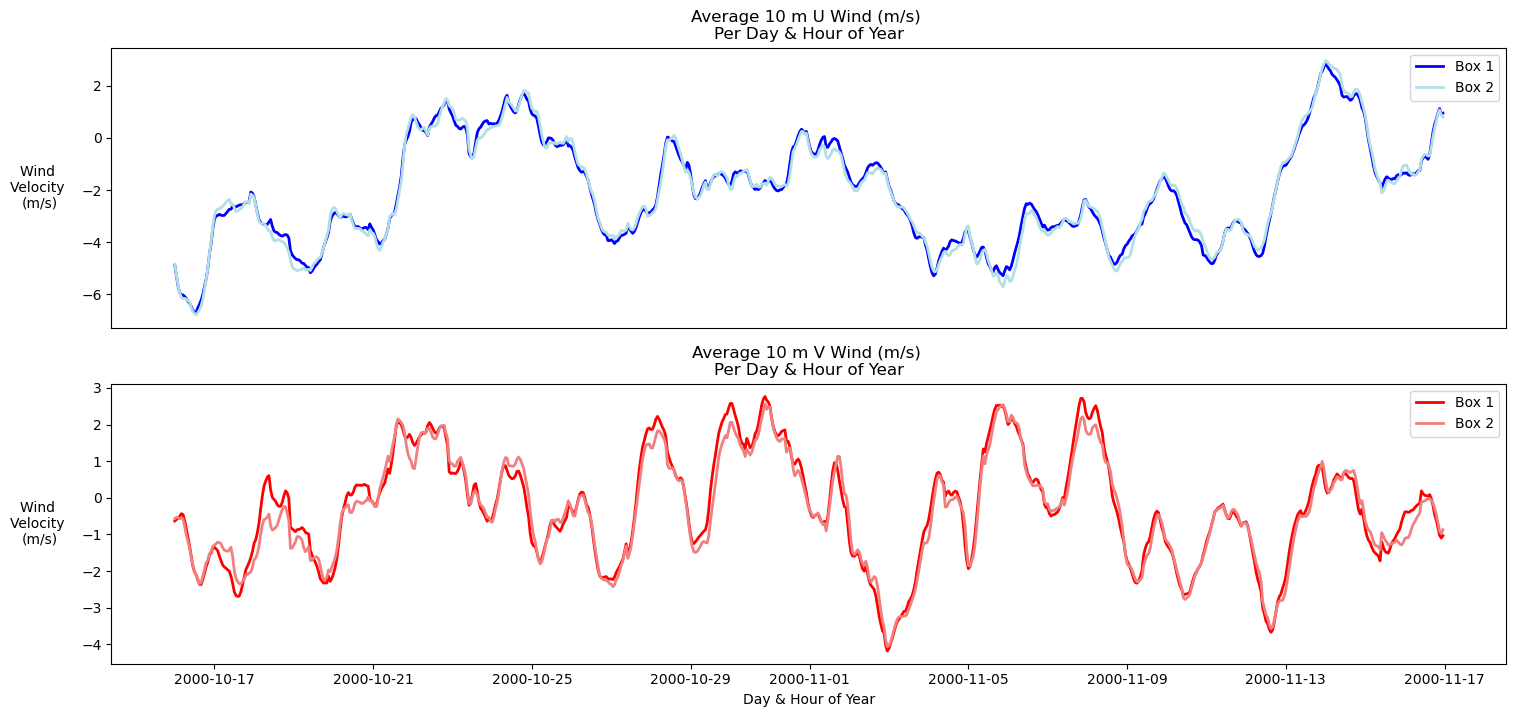

In [26]:
# Trim to just the period we want
# Plot the values around freeze-up which is mid-October to mid-November (ish)
# September 15 - October 15 = days 289 - 320 (leap year)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(hourly_datetimes[289*24:321*24], u10_reg1_avg_doy_hrly2[289*24:321*24], color='blue', linewidth=2, label='Box 1')
ax[0].plot(hourly_datetimes[289*24:321*24], u10_reg2_avg_doy_hrly2[289*24:321*24], color='powderblue', linewidth=2, label='Box 2')
ax[0].set_title('Average 10 m U Wind (m/s) \nPer Day & Hour of Year')
ax[0].set_ylabel('Wind \nVelocity \n(m/s)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(hourly_datetimes[289*24:321*24], v10_reg1_avg_doy_hrly2[289*24:321*24], color='red', linewidth=2, label='Box 1')
ax[1].plot(hourly_datetimes[289*24:321*24], v10_reg2_avg_doy_hrly2[289*24:321*24], color='lightcoral', linewidth=2, label='Box 2')
ax[1].set_title('Average 10 m V Wind (m/s) \nPer Day & Hour of Year')
ax[1].set_ylabel('Wind \nVelocity \n(m/s)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day & Hour of Year')
ax[1].legend()

In [ ]:
# Do some sort of frequency analysis of this??
# orrr just leave it...
